# Finding The Best Markets to Advertise In - Analysis

# Project's Goal

One of the ways for a company to give visibility to its project is by advertising in the right places. With this in mind, this project aims to find out what are the best markets for an e-learning company to advertise in. The company in question creates courses on web design and coding, but on other topics as well, like data science and game developing.

In this context, the word "best" conveys different meanings. Therefore, it's possible to divide the project in the following tasks:

1) Find out the countries with the highest number of survey takers.

2) Find out in which countries survey takers spend the most money. 

3) Finally, we can make polite guesses on what communication channels to advertise in (due to limitations to file sizes which can be uploaded to GitHub, this task will be accomplished in another notebook called "Finding the Best Markets to Advertise in - Visualization.

Obs: If you're interested into the visualization, check out the notebook "Finding The Best Markets to Advertise In - Visualization".

# Considerations On The Dataset

On a "real" project, in order to achieve this task, it would be possible to conduct independent surveys on different markets to find out which one is the most promising. However, this would be very costly and time consuming. Therefore, we'll use the data from a survey by freeCodeCamp. freeCodeCamp is a website that teachs web-developing for free. In its survey from 2017, they got more than [30.000 respondents](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). The data can be found in their [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

Since freeCodeCamp is a free website, we could expect that the money survey takers declared to spend on learning is rather low, but the survey results should still be good enough to point us in the right direction.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import altair as alt

# Is The Dataset Compatible With Our Goals ?

As mentioned, we're using a ready-made dataset. On that account, we have to check if it actually contains information that can lead us towards our goal. Below, there is a small preview of how the data set looks like, as well as the number of rows and columns it contains. 

In [2]:
fcc = pd.read_csv(r"C:\Users\celio\Data Analysis\Projects\FInding the Best Markets to Advertise In\2017-fCC-New-Coders-Survey-Data.txt", low_memory=False)
fcc.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of Rows = {}\nNumberof Columns = {}".format(fcc.shape[0],fcc.shape[1]))

Number of Rows = 18175
Numberof Columns = 136


The dataset contains over 18.000 rows and 136 columns, which makes it quite hard to analyse. Nevertheless, we can search the name of the columns deeper to try and find data that indicates whether the information contained on the survey in representative or not of the target groups of the e-learning company. 

The name of all rows present in the DataFrame is shown below.

In [4]:
print(fcc.columns[:30],"\n\n",
      fcc.columns[30:60],"\n\n", 
      fcc.columns[60:90],"\n\n",
     fcc.columns[90:120],"\n\n",
     fcc.columns[120:136])

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus'],
      dtype='object') 

 Index(['EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage',
       'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe',
       'HoursLearning', 'ID

The following columns look promising. They seem to contain data on career paths that survey takers pursue.

In [5]:
job_info = ["JobInterestBackEnd", "JobInterestDataEngr",
       'JobInterestDataSci', 'JobInterestDevOps', 'JobInterestFrontEnd',
       'JobInterestFullStack', 'JobInterestGameDev','JobInterestInfoSec', 'JobInterestMobile', 'JobInterestOther',
       'JobInterestProjMngr', 'JobInterestQAEngr', 'JobInterestUX','JobPref','JobRoleInterest']

jobs = fcc[job_info]
jobs.head(3)

,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRoleInterest
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN
1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,Full-Stack Web Developer
2,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,"Front-End Web Developer, Back-End Web Develo..."


It looks like most of the columns have a sorte of "True or False" logics, where True values are marked as 1 and False is marked a NaN values. On the other hand, the JobRoleInterest column looks more promising, since it contains job titles the survey takers want to pursue.

### Removing Null Values and Finding Most Common Interests

In [6]:
job_interest = jobs[jobs["JobRoleInterest"].notnull()]["JobRoleInterest"] # Removes Null values
print("Number of Rows After Removing Null Values {}".format(job_interest.count()))
melted_job_interest = job_interest.str.split(",",expand=True).melt( # Creates a DF from the JobRoleInterest Column
    value_vars = range(0,13), value_name = "JobInterest").sort_values("JobInterest") #Transforms wide to long,rename,sort

melted_job_interest["JobInterest"] = melted_job_interest["JobInterest"].str.lstrip() # Additional Cleaning (whitespaces
                                                                                    # that appeared after splitting)
                                                                                    # This influences value_counts later

for i,c in enumerate(melted_job_interest["JobInterest"]): # Loop to remove None values
# None values appear when splitting the strings. Removing then is trickier than removing null values
# Identity operators have to be used instead of identity. After enumerating, cut has the index of the first None value
    if c is None: 
        cut = i
        break
        
melted_job_interest = melted_job_interest.iloc[:cut,:] # Slices the DataFrame
# Instatiates a DF based on the Frequency Count, sort the DF to find the most popular values.
job_freq_count = pd.DataFrame(melted_job_interest["JobInterest"].value_counts().sort_values(ascending =False).head(10))
# Resets Index and rename columns
job_freq_count = job_freq_count.reset_index().rename(columns ={"index":"JobInterest","JobInterest":"values"})

job_freq_chart = alt.Chart(job_freq_count).mark_bar().encode(
    x= alt.X("values", 
             axis = alt.Axis(title ="Number of Interested Survey Takers", titleFontSize=12,labelFontSize=12)),
    y= alt.Y("JobInterest", axis = alt.Axis(title = "J o b   I n t e r e s t", titleFontSize=12, labelFontSize=12)),
    color = "JobInterest") # Plot bar Chart
    
job_freq_text = job_freq_chart.mark_text(align = "left",
                                        baseline = "middle",
                                        dx=3).encode(text="values") # Plot Annotations

(job_freq_chart+job_freq_text).properties(width=650,height=350, 
                                          title = "Most Common Job Interests Among Survey Takers")

Number of Rows After Removing Null Values 6992


alt.LayerChart(...)

It looks like the job interests of survey takers are well-aligned with the company's content. We can therefore proceed the analysis. 

# What's The Location Of Target Groups ?

Now that we decided to proceed the analysis with the results of the freeCodeCamp survey, the next step is to find out where the target groups are. A column worthwhile checking in this matter is the "CountryLive" columns from the main DataFrame.

In [44]:
top_countries = fcc.pivot_table(index="CountryLive",
                                values="NetworkID",
                                aggfunc="count").rename(
    columns={"NetworkID":"n_survey_takers"}).sort_values("n_survey_takers",ascending=False)

top_countries = top_countries.reset_index()
top_countries.to_csv(r"C:\Users\celio\Data Analysis\Projects\FInding the Best Markets to Advertise In\top_countries.csv")
top_countries.head(10)

,CountryLive,n_survey_takers
0,United States of America,5791
1,India,1400
2,United Kingdom,757
3,Canada,616
4,Brazil,364
5,Germany,324
6,Poland,265
7,Russia,263
8,Australia,259
9,France,228


In [8]:
chart_top_countries = alt.Chart(top_countries.head(10), 
                                title = "Countries With Most Survey Takers").mark_bar().encode(
    
    x= alt.X("CountryLive", axis = alt.Axis(title="Country", titleFontSize=16, labelAngle=-45,
                                           labelFontSize=13)),
    
    y= alt.Y("n_survey_takers",axis = alt.Axis(title="Number of Survey Takers", titleFontSize=16)),
    
    color = "CountryLive").properties(width=700,height=350)



top_countries_text = chart_top_countries.mark_text(align="center",
                                                  baseline="middle",
                                                  dy=-5).encode(
    text= "n_survey_takers")

(chart_top_countries+top_countries_text).configure_title(fontSize=16)

alt.LayerChart(...)

The chart above shows the 10 countries the highest number of survey takers. We can focus on them to find out what are the best markets to advertise in.

We can also visualize the number of survey takers by country in the interactive map below.

# Most Money Spent For Learning

The second task of this project is to investigate where survey takers spend the most money. The reson for this is the impact that the monthly budget dedicated to learning has on consumption of e-learning products.

If we take another look at the columns in the main DataFrame, there are some columns that can help us answering this questions, namely the "MoneyForLearning" and the "MonthsProgramming". By dividing the columns, it's possible to find out how much money users spend on average for learning.

In [9]:
fcc_clean = fcc.copy()
fcc_clean = fcc_clean[fcc_clean["CountryLive"].notnull()]
fcc_clean = fcc_clean[fcc_clean["MoneyForLearning"].notnull()]
fcc_clean = fcc_clean[fcc_clean["MonthsProgramming"].notnull()]
fcc_clean.head(3)

countries = {}
for country in top_countries["CountryLive"].head(10).unique():
    countries[country] = fcc_clean.loc[fcc_clean["CountryLive"]==country]
    
top_markets = pd.concat(countries).reset_index()
top_markets.head(3)

,level_0,level_1,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,United States of America,1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2,United States of America,7,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Relation Between Months Programming and Amount Spent For Learning

Below we can visualize the relation between the amount spent for learning monthly and the time since survey takers started programming in the top 10 countries. 

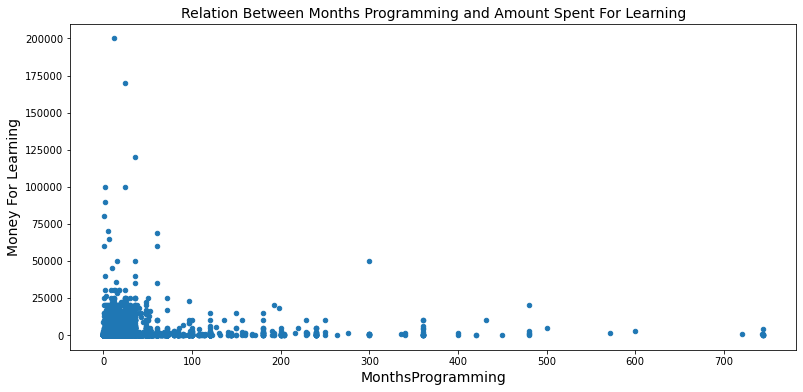

In [10]:
money_month = top_markets.plot.scatter(x="MonthsProgramming",y="MoneyForLearning",
                                 figsize=(13,6))

plt.xlabel("MonthsProgramming", fontsize=14)
plt.ylabel("Money For Learning", fontsize=14)
plt.title("Relation Between Months Programming and Amount Spent For Learning",
         fontsize=14)
plt.show()

Based on the scatter plot above, we can see that most survey takers have been learning how to code for little time and have also spent very few money. 

However, some data points look of, like the extremes on the lower right side(over 700 months programming, which accounts for about 58 years) and top left side (200.000 dollars spent on learning in less than 100 months).

### Creating The MonthBudget Column

We can create a new column called MonthBudget, which contains the division between MoneyForLearning and MonthsProgramming and therefore indicates how much money survey takers spent on average per Month. 

In [11]:
top_markets["MoneyForLearning"].describe()

count      9475.000000
mean       1144.957995
std        5112.685306
min           0.000000
25%           0.000000
50%          20.000000
75%         300.000000
max      200000.000000
Name: MoneyForLearning, dtype: float64

In [12]:
top_markets["MonthsProgramming"].describe()

count    9475.000000
mean       20.703325
std        43.491536
min         0.000000
25%         3.000000
50%         9.000000
75%        24.000000
max       744.000000
Name: MonthsProgramming, dtype: float64

Before we create the new column, we have to replace some values in the MonthsProgramming column. Some survey takers have answered that they've been learning for 0 months. This could be the case for young coders who have not yet completed one whole month of learning. For this reason, we'll change 0 values in the column MonthsProgramming to 1.

In [13]:
top_markets["MonthsProgramming"] = top_markets["MonthsProgramming"].replace({0:1})

Now we can create the column.

In [14]:
top_markets["MonthBudget"] = top_markets["MoneyForLearning"]/top_markets["MonthsProgramming"]

In [15]:
top_markets["MonthBudget"].describe()

count     9475.000000
mean       153.523727
std       1428.313010
min          0.000000
25%          0.000000
50%          1.666667
75%         30.000000
max      80000.000000
Name: MonthBudget, dtype: float64

We can check the distribution of the column below.

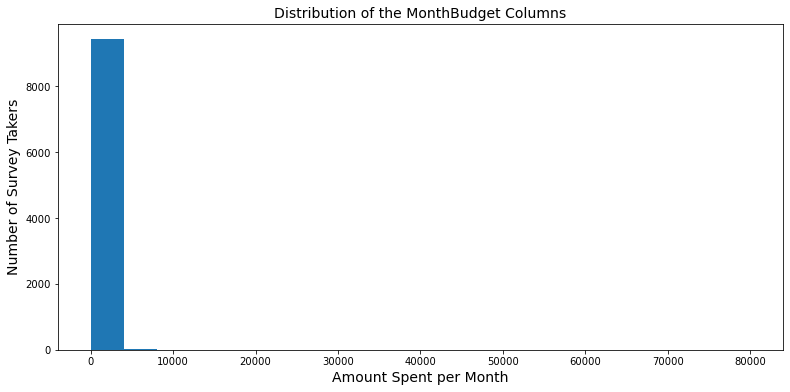

In [16]:
month_budget = top_markets["MonthBudget"].plot.hist(bins = 20, figsize=(13,6))
plt.xlabel("Amount Spent per Month", fontsize=14)
plt.ylabel("Number of Survey Takers", fontsize=14)
month_budget.set_title("Distribution of the MonthBudget Columns", fontsize=14)
plt.show()

As expected, the MonthBudget is also heavily skewed to the right. On top of that, it seems that some survey takers spent up to 80.000 dollars per month, which should be seen with scepticism. We can investigate this further.

Below, there is a list with the 30 users who spent the most per month.

In [17]:
odd_results = top_markets[top_markets["MoneyForLearning"]>200][["MoneyForLearning",
                                                            "MonthsProgramming","MonthBudget"]].sort_values(
    "MonthBudget", ascending = False)

odd_results.head(30)

,MoneyForLearning,MonthsProgramming,MonthBudget
4043,80000.0,1.0,80000.000000
4992,60000.0,1.0,60000.000000
970,100000.0,2.0,50000.000000
643,90000.0,2.0,45000.000000
4681,25000.0,1.0,25000.000000
8897,40000.0,2.0,20000.000000
9042,20000.0,1.0,20000.000000
4767,200000.0,12.0,16666.666667
2416,15000.0,1.0,15000.000000
5059,30000.0,2.0,15000.000000


Considering that the [average bootcamp price in the United States ranges from 5.000 to 20.000 Dollars](https://www.coursereport.com/blog/coding-bootcamp-cost-comparison-full-stack-immersives), one possible explanation for the amount spent could be the attendance to bootcamps.

We can merge the results with the AttendedBootcamp from the fcc_clean DataFrame to find it wheter this supposition holds true or not.

In [18]:
attented_bootcamp = pd.merge(left = odd_results, right = fcc_clean["AttendedBootcamp"],
                            left_index = True, 
                             right_index = True,
                             how = "inner")

print("Attended Bootcamp ?\n")
print(attented_bootcamp["AttendedBootcamp"].replace({0:False,1:True}).value_counts())

attented_bootcamp.sort_values("MonthBudget",ascending =False).head(30)

Attended Bootcamp ?

False    2071
True      163
Name: AttendedBootcamp, dtype: int64


,MoneyForLearning,MonthsProgramming,MonthBudget,AttendedBootcamp
4043,80000.0,1.0,80000.000000,0.0
4992,60000.0,1.0,60000.000000,0.0
643,90000.0,2.0,45000.000000,0.0
4681,25000.0,1.0,25000.000000,0.0
8897,40000.0,2.0,20000.000000,0.0
9042,20000.0,1.0,20000.000000,0.0
4767,200000.0,12.0,16666.666667,0.0
2416,15000.0,1.0,15000.000000,0.0
5059,30000.0,2.0,15000.000000,1.0
2077,14500.0,1.0,14500.000000,0.0


It does not seem that our supposition holds true. Even though some users with a quite high monthly budget for learning do count as bootcamp-attenders, there is no pattern to be seem.

Given that most survey takers are from the United States, another possible explanation could be that coders inserted their college fees and tuition while answering the survey, which could possibly explain the high values. On the other hand, in some cases, it could be a simple typo. 

As practical solution, taking again the costs of a bootcamp in the US as a consideration, we'll exclude any entries with a MonthBudget value of over 20.000 *.

\* At this point, there many ways to proceed. It's possible to proceed with more "representative" data. That is, check how much 75% or 90% of the survey takers are willing to spend or even remove [outliers](https://en.wikipedia.org/wiki/Outlier). But in order to make this project more "palatable", we'll simply exclude absurdly high values.

In [45]:
top_markets = top_markets[top_markets["MonthBudget"]<=20000]
top_markets.to_csv(r"C:\Users\celio\Data Analysis\Projects\FInding the Best Markets to Advertise In\top_markets.csv")

In [20]:
top_markets["MonthBudget"].describe()

count     9470.000000
mean       126.149664
std        669.975066
min          0.000000
25%          0.000000
50%          1.666667
75%         29.852941
max      20000.000000
Name: MonthBudget, dtype: float64

# Amount Spent By Country

Finally, we can find out how much survey takers spend on average and check if there are differences between the countries.

In [21]:
budget = top_markets.pivot_table(index="CountryLive",values = "MonthBudget",aggfunc="mean")
budget

,MonthBudget
CountryLive,
Australia,197.509846
Brazil,56.850199
Canada,118.434054
France,54.866589
Germany,35.331850
India,66.526198
Poland,94.262158
Russia,129.173830
United Kingdom,55.774980


We can visually compare this information to the number of survey takers by country.

In [22]:
# # Altair does not process more than 5000 rows by default
# # With the code below, we are overriding this configuration
# alt.data_transformers.disable_max_rows()

In [23]:
# avg_amount_spent = alt.Chart(top_markets).mark_bar().encode(
#     x= alt.X("CountryLive", axis = alt.Axis(title ="Country", titleFontSize=14,
#     labelAngle=-45,labelFontSize=12)),
#     y= alt.Y("mean(MonthBudget)", axis = alt.Axis(title = "Average Amount Spent per Month", titleFontSize=14,
#     labelFontSize=12)),
#     color = "CountryLive").properties(width=700)

# avg_amount_spent_text = avg_amount_spent.mark_text(align = "center",
#                                                   baseline="middle",
#                                                   dy=-5).encode(
#                                                         text= "mean(MonthBudget)")

# # (avg_amount_spent+avg_amount_spent_text).properties(
# #     width=725,
# #     height = 400,
# # title = "Average Amount Spent By Survey Takers according to Country").configure_title(fontSize=14) 

# alt.vconcat((avg_amount_spent+avg_amount_spent_text),(chart_top_countries+top_countries_text))

In [24]:
ratio = budget.reset_index()
ratio = ratio.merge(right=top_countries, on = "CountryLive",how="left")
ratio["ratio"] = ratio["MonthBudget"]/ratio["n_survey_takers"]
ratio

,CountryLive,MonthBudget,n_survey_takers,ratio
0,Australia,197.509846,259,0.762586
1,Brazil,56.850199,364,0.156182
2,Canada,118.434054,616,0.192263
3,France,54.866589,228,0.240643
4,Germany,35.331850,324,0.109049
5,India,66.526198,1400,0.047519
6,Poland,94.262158,265,0.355706
7,Russia,129.173830,263,0.491155
8,United Kingdom,55.774980,757,0.073679
9,United States of America,158.919644,5791,0.027443


# Conclusions

The first things that jumps to the eye is that the **United States bar remains high on both charts**. This indicates that the ratio between number of users and amount spent per month is quite low - it does not vary. Normally, we should expected that the higher the number of users, the less money they spent - the expected result is a great variation. 

There are multiple reasons for this. The first one is that **as the number of survey takers gets higher, the divisor increases, mathematically decreasing the result of the division**. On top of this,more people joining the calculation, means **including people that may not have the same purchase opportunities**. Also, the higher the number of survey takers involved in the calculation, the less motivated people may get (in any area, there are few people really motivated about their job or activity and more **people whho have a more passive behaviour - in the present case, spend less**. All these factors bring down the amount spent pro person in large groups.

With that being said, we should not only **take into consideration the amount spent by coders** in each country, but also consider the **ratio between the amount spent and the number of coders in a given location**.

At this point, it could be time to **send this analysis to the market team, so that they could use their expertise to help decide where to advertise**. An english speaking company, for example, could pick Canada or United Kingdom over India, for example. Another option would be splitting the advertisement budget between multiple countries. 

What we can do to help them is to verify what are the most common communication channels in those countries. 

## Continues on the notebook - "Finding the Best Markets to Advertise In - Visualizations".

# Code Events, Podcasts, Resources and Youtube

The dataset also offers information on what code events survey takers attended, as well as podcasts and youtube channels they listen/watch. Given the high number of events, youtube channels and podcasts there are, it's hard to make a decision based only on the data, however this information may help the marketing team when looking for events, podcasts or youtube channels to sponsor as advertising. 

We'll gather all this information and then we'll plot it in a map to facilitate navigation.

### Function To Retrieve The Data

The function below takes a string as an argument and slices the top_market data frame we have been working with. It than transforms it into a pivot_table to find out how many survey takers attended each event. After that, the function finds the first 5 most attended events or resources or podcasts or youtube channels, depending on the string value passed, and plots a chart.

In [25]:
def find_object(string_value): # Takes string values
    
    cols = ["CountryLive"] # Instiation of a list with one object (CountryLive) - will be used to slice DF
    
    for c in top_markets.columns: # Loops through the columns of the top_markets DataFrame
        if string_value in c: # Checks if the string value is in the DataFrame
            cols.append(c) # if True, appends the value to cols list.
            
    df = top_markets[cols] # slices the DataFrame with the cols list
    df_pivot = df.pivot_table(index="CountryLive",aggfunc="sum") # creates a pivot table 
                                            # Groups by country and sums up number of survey takers who attended each event
    
    charts = dict.fromkeys(df_pivot.index) # Instantiates a dictionary to store chart
    for obj in df_pivot.index: # loops through the countries in the df_pivot_index
        most_popular = df_pivot.loc[obj].sort_values(ascending =False).head(5).reset_index() # selects top 5 results
        most_popular.columns = [string_value,"n_survey_takers"] # changes column names
        # Plot Chart
        charts[obj] = alt.Chart(most_popular,
                               title = "Most Frequented {} in {}".format(string_value,obj)).mark_bar().encode( 
                                # Title uses string value and country name for formating
                                
                                y = alt.Y(string_value,axis = alt.Axis(labelFontSize=12)),
                                
                                x= alt.X("n_survey_takers",axis = alt.Axis(title = "Number of Participants")),
                                
                                color = string_value)
        
    return charts # returns a dictionary

### Events

Below there is an extensive example of how it works with the "CodeEvent" string argument.

In [26]:
events= find_object("CodeEvent")
alt.vconcat(events["Australia"],events["Brazil"],events["Canada"],
           events["France"],events["Germany"],events["India"],events["Poland"],
           events["Russia"],events["United Kingdom"],events["United States of America"])

alt.VConcatChart(...)

### Podcasts

Small example with the "Podcast" argument.

In [27]:
podcasts = find_object("Podcast")
podcasts["Brazil"]


alt.Chart(...)

### Resources

In [28]:
resources = find_object("Resource")
resources["United States of America"]

alt.Chart(...)

### Youtube

In [29]:
youtube = find_object("YouTube")
youtube["Brazil"]

alt.Chart(...)

Now that we have all the data, we can plot a map to visualize it.

# Creating The Interactive Map

#### Importing Map Coordinates

We're not actually importing coordinates, but a geojson file to lay over the country, in order to present results.

In [30]:
# We're actually not importing coordinates, but a geojson file to lay over the map
# With the Geojson, we can build a choropleth file.
layer = gpd.read_file(r"C:\Users\celio\Data Analysis\Projects\FInding the Best Markets to Advertise In\custom.geo.json")
layer =layer[["admin","name","geometry"]] # We're slicing the Geopandas DF because that's everything we need.
layer.head(3)

,admin,name,geometry
0,Albania,Albania,"POLYGON ((20.59025 41.85540, 20.46318 41.51509..."
1,Austria,Austria,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
2,Belgium,Belgium,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."


#### Merging DataFrames

To plot the map, we have to make sure that the countries in the Geopandas DataFrame and the top_countries DataFrame are written the same way. 

However, before we do this, we have to check if there aren't any duplicates in top_countries DataFrame.

In [31]:
# There are no perfect duplicates on the DataFrame, however some countries may have different names or spelling
# Like Serbia and Republic for Serbia. So we'll check for those

for country in top_countries["CountryLive"].values:
    # Parameter is a selection of all entries containing the name of a country
    parameter = top_countries.loc[top_countries["CountryLive"].str.contains(country),"CountryLive"]
    if parameter.count() > 1: #If the number of matches is higher than 1, it's probably a problematic name
        print(parameter,"\n")

1                         India
151    British Indian Ocean Ter
Name: CountryLive, dtype: object 

21                Serbia
70    Republic of Serbia
Name: CountryLive, dtype: object 

11     Nigeria
104      Niger
Name: CountryLive, dtype: object 

57     Dominican Republic
125              Dominica
Name: CountryLive, dtype: object 



C:\Anaconda\envs\data\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Apparently, the only "duplicated" country is Serbia, which has entries as Serbia and Republic of Serbia. We'll sum the result of both countries and keep only the first entry.

The other entries refer only to countries with similar names. 

In [32]:
top_countries[top_countries["CountryLive"].str.contains("Serbia")]

,CountryLive,n_survey_takers
21,Serbia,115
70,Republic of Serbia,24


In [33]:
top_countries.loc[top_countries["CountryLive"]=="Serbia","n_survey_takers"]= 115+24

In [34]:
top_countries = top_countries.drop(70)

Now we can get back to the main test, which is to find out what countries are featured in the top_countries DataFrame that aren't in the layer DataFrame.

In [35]:
test_df=pd.merge(left=top_countries,right=layer,
                left_on="CountryLive",right_on="name",
                how="left")

missing = test_df[test_df["name"].isnull()]
missing

,CountryLive,n_survey_takers,admin,name,geometry
0,United States of America,5791,NaN,NaN,None
16,"Netherlands (Holland, Europe)",142,NaN,NaN,None
31,Singapore,75,NaN,NaN,None
34,Czech Republic,72,NaN,NaN,None
47,Great Britain,45,NaN,NaN,None
53,Bosnia & Herzegovina,40,NaN,NaN,None
57,Dominican Republic,32,NaN,NaN,None
64,Korea South,29,NaN,NaN,None
66,Hong Kong,25,NaN,NaN,None
80,Virgin Islands (USA),15,NaN,NaN,None


Now that we know what are the problematic entries, we can modify the name of the countries accordingly. To make the work easier, we'll only work with the entries containing at least 20 survey takers.

#### United Kingdom x Great Britain

A closer look shows that Great Britain did not find a match in the Layer DataFrame. A quick work around is to assign the survey takers from Great Britain to United Kingdom, since [Great Britain is contained in the UK](https://www.britannica.com/story/whats-the-difference-between-great-britain-and-the-united-kingdom).

In [36]:
# We're just adding the number of survey takers from UK (757, see top_countries DF) to the number of survey takers in GB.
top_countries.loc[top_countries["CountryLive"]=="Great Britain","n_survey_takers"] = 757+45
# Then we drop Great Britain
top_countries = top_countries.drop(47)

#### Investigating Further Entries

In [37]:
# Creating a new DataFrame with the names of the countries
problematic = missing.loc[missing["n_survey_takers"]>=20,"CountryLive"].str.split(expand=True)

for name in problematic[0]:
    root_of_problem = layer.loc[layer["name"].str.contains(name),"name"]
    print(problematic.loc[problematic[0]==name],"\n",
          root_of_problem,"\n\n")

        0       1   2        3
0  United  States  of  America 
 13           United Kingdom
93     United Arab Emirates
162           United States
Name: name, dtype: object 


              0          1        2     3
16  Netherlands  (Holland,  Europe)  None 
 27    Netherlands
Name: name, dtype: object 


            0     1     2     3
31  Singapore  None  None  None 
 Series([], Name: name, dtype: object) 


        0         1     2     3
34  Czech  Republic  None  None 
 7    Czech Rep.
Name: name, dtype: object 


        0        1     2     3
47  Great  Britain  None  None 
 Series([], Name: name, dtype: object) 


         0  1            2     3
53  Bosnia  &  Herzegovina  None 
 4    Bosnia and Herz.
Name: name, dtype: object 


            0         1     2     3
57  Dominican  Republic  None  None 
 153    Dominican Rep.
Name: name, dtype: object 


        0      1     2     3
64  Korea  South  None  None 
 113              Korea
124    Dem. Rep. Korea
Name: name, dtype

The result might not be very clear, but basically:

1) United States of America in the top_countries is written as United States in the name column of the layer DF

2) Netherlands (Holland,Europe) equals Netherlands

3) No entries were found for Great Britain, Singapore und Hong Kong

4) Czech Republic is Czech Rep.

5) Dominican Republic is Dominican Rep.

6) South Korea has become Korea

We'll correct the entries for finally merge the DataFrames and plot the map.

In [38]:
layer.loc[layer["name"]=="United States","name"] = "United States of America"
top_countries.loc[top_countries["CountryLive"]=="Netherlands (Holland, Europe)","CountryLive"] = "Netherlands"
layer.loc[layer["name"]=="Czech Rep.","name"] = "Czech Republic"
top_countries.loc[top_countries["CountryLive"]=="Bosnia & Herzegovina","CountryLive"] = "Bosnia and Herz."
layer.loc[layer["name"]=="Dominican Rep.","name"]= "Dominican Republic"
layer.loc[layer["name"]=="Korea","name"] = "Korea South"

We can check the results:

In [39]:
check = pd.merge(left=top_countries,right=layer,
                left_on="CountryLive",right_on="name",
                how="left")
check[check["name"].isnull()]

,CountryLive,n_survey_takers,admin,name,geometry
31,Singapore,75,NaN,NaN,None
65,Hong Kong,25,NaN,NaN,None
79,Virgin Islands (USA),15,NaN,NaN,None
97,Malta,6,NaN,NaN,None
103,Mauritius,5,NaN,NaN,None
104,Republic of Montenegro,5,NaN,NaN,None
106,Trinidad & Tobago,5,NaN,NaN,None
107,Cote D'Ivoire,5,NaN,NaN,None
115,Maldives,4,NaN,NaN,None
116,Bahrain,4,NaN,NaN,None


It worked! We're helpless concerning Singapore and Hong Kong. If these countries are not featured in the map with the geojson layer, there is little we can do about them. The other countries on the list all have less than 20 survey takers.

# Merging DataFrames

Now that we cleaned the data, we are able to plot the map. The final step is merging the clean versions of top_countries and layer.

In [40]:
geo = pd.merge(left=layer,right=top_countries,
              left_on="name",right_on="CountryLive",
              how="left") 

# """Notice that we inverted the order of the DataFrames. Layer is now on the left side of merging
# while top_countries is on the right side. Merging like this allows the information to be stored in a geopandas DF
# instead of a regular df, which makes easier for folium (the library that plots the map) to read it"""

# This was done manually but for more entries, we could have used the googlemaps API
# On more about the usage of Googlemaps API, I recommend taking a look at my Notebook Open Legal Data

coordinates = {"Australia":[-33.8469759,150.37],
              "Brazil":[-23.6815314,-46.8],
              "Canada": [43.7184038,-79.5],
              "France":[48.8589507,2.27],
              "Germany":[52.5069312,13.14],
              "India":[19.0825223,72.741],
               "Poland":[52.2330269,20.78],
               "Russia":[55.5815244,36.82],
              "United Kingdom":[51.5287352,-0.3817],
              "United States of America":[38.89378,-77.15]} ## Instanting a Dictionary With Coordinates of Capital Cities

layers = {"Events":events,"Podcasts":podcasts,"Resources":resources,"Youtube":youtube}

In [41]:
earth = folium.Map(location=[49,13],zoom_start=2)

In [42]:
#FUNCTION TO CREATE MARKERS THAT WILL BE ADDED TO THE MAP
def create_markers(keyword,color):
    
    fg = folium.FeatureGroup(name = keyword).add_to(earth)
    d = layers.get(keyword)
    for key in d:
        marker = folium.Marker(
            location = coordinates[key],
            icon = folium.Icon(color = color),
            tooltip = key,
            popup = folium.Popup(max_width=500).add_child(
                    folium.VegaLite(data =podcasts[key],
                                   width =450,
                                   height = "80%"))
                          ).add_to(fg)

# Interactive Map With Target Groups

The map below summarizes the following information:

## 1) The Number of Survey Takers By Country
    
    - This is shown in the choropleth map. The darker the color of a country, the higher the number of survey takers located there.
    
    - To visualize the number of survey takers, it suffices to hoover the mouse over the country.
    
## 2) The main communication channels for the top countries.

    - Every channel (Event, Podcast, Resource, Youtube) is accessible through the layer control at the right of the map
    
    - The top 5 most attended/heard/consumed/watched events/podcasts/resources/youtube channels are show upon clicking the marker of each country.

In [43]:
choropleth = folium.Choropleth(geo_data = geo,
                              data = geo,
                              columns = ["CountryLive","n_survey_takers"],
                              key_on="feature.properties.name", # This is tricky and it's worst part of using folium
                                                                # Regardless of how the json file is organised
                                                               # this string always starts with feature (without an s)
                                                               # even if the json file says features (with an s)
                                                               # the rest of the string is JavaScript Notation
                                                               # according to the JSON file
                                                               # Best way to find out the string is play with the
                                                               # json file via the python json library
                               
                               bins = 9, # Unfortunately Folium Only Support 9 Bins, more would have been better
                               fill_color = "YlGn",
                              highlight=True,
                              legend_name = "Number Of Survey Takers by Country",
                              name = "Choropleth").add_to(earth)

event_markers = create_markers("Events","cadetblue")
podcast_markers = create_markers("Podcasts","orange")
resource_markers = create_markers("Resources","green")
youtube_markers = create_markers("Youtube","red")


choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(["CountryLive","n_survey_takers"],
                                   aliases = ["Country", "Number of Participants"]))


folium.LayerControl().add_to(earth)

earth

# Final Conclusions

In this project, we tried to find out the **best countries to advertise in**. We analyzed the results of a survey conducted by freeCodeCamp. After verifying whether the dataset contained relevant data for our goal or not by **checking if the job interests of survey takers match the products sold by the company** (an e-learning company specialized in web-design, game developing, programming, data science and etc), we found out the countries with the highest density of survey takers. 

The countries with the highest number of survey takers are: **"United States, India, United Kingdom, Canada, Brazil, Germany, Poland, Russia, Australia and France".**

Then we checked in what countries survey takers spend the most on learning. For this analysis, we considered only the countries mentioned above. Specially interesting were the results in **Australia, Poland and Russia**, where, in spite of the small number of survey takers, the average amount spent by survey takers was very high.

At this point, it was clear that **one of the markets for advertisement should be the United States**, because of the high number both of survey takers and amount spent for learning. Nevertheless, we'd **recommend sending the results of this analysis to the marketing specialist** so they can participate on the decision making, since there are many variables to consider, for example, the **language spoken** in each country or the GDP and **other measures of social development**.

Finally, to help decision making and summarize information, we created an **interactive map** showing the number of survey takers in each country, as well as the most common events, podcasts, resources and youtube channels in the top countries.